# Creation of a mesh

In this example we will demonstrate how to create a mesh $\mathcal{M}$ associated to a domain $\mathcal{D} \in \mathbb{R}^n$.

A mesh is defined from vertices in $\mathbb{R}^n$ and a topology that connects the vertices: the simplices. The simplex $Indices([i_1,\dots, i_{n+1}])$ relies the vertices of index $(i_1,\dots, i_{n+1})$ in $\mathbb{N}^n$. In dimension 1, a simplex is an interval $Indices([i_1,i_2])$; in dimension 2, it is a triangle $Indices([i_1,i_2, i_3])$.

The library enables to easily create a mesh which is a box of dimension $d=1$ or $d=2$ regularly meshed in all its directions, thanks to the object IntervalMesher.

Consider $X: \Omega \times \mathcal{D} \rightarrow \mathbb{R}^d$ a multivariate stochastic process of dimension $d$, where $\mathcal{D} \in \mathbb{R}^n$. The mesh $\mathcal{M}$ is a discretization of the domain $\mathcal{D}$.

In [1]:
from __future__ import print_function
import openturns as ot
import math as m

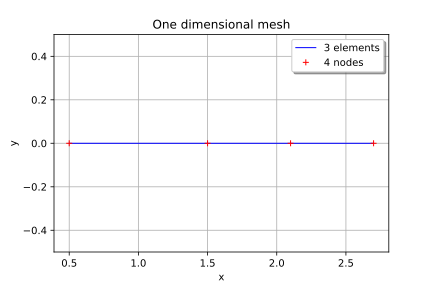

In [2]:
# Define a one dimensional mesh
vertices = [[0.5], [1.5], [2.1], [2.7]]
simplicies = [[0, 1], [1, 2], [2, 3]]
mesh1D = ot.Mesh(vertices, simplicies)
graph1 = mesh1D.draw()
graph1.setTitle('One dimensional mesh')
graph1

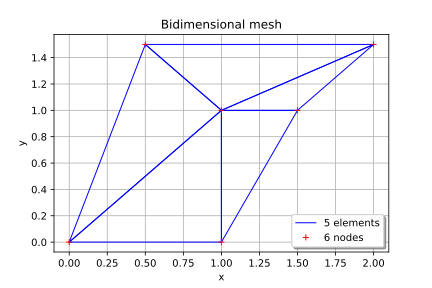

In [3]:
# Define a bi dimensional mesh
vertices = [[0.0, 0.0], [1.0, 0.0], [1.0, 1.0], [1.5, 1.0], [2.0, 1.5], [0.5, 1.5]]
simplicies = [[0, 1, 2], [1, 2, 3], [2, 3, 4], [2, 4, 5], [0, 2, 5]]
mesh2D = ot.Mesh(vertices, simplicies)
graph2 = mesh2D.draw()
graph2.setTitle('Bidimensional mesh')
graph2.setLegendPosition('bottomright')
graph2

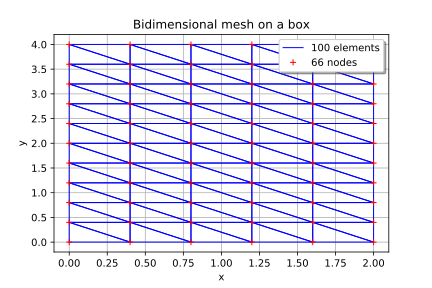

In [4]:
# Case 2: Define a mesh wich is regularly meshed box
# in dimension 1 or 2

# Define the number of interval in each direction of the box
myIndices = [5, 10]
myMesher = ot.IntervalMesher(myIndices)

# Create the mesh of the box [0., 2.] * [0., 4.]
lowerBound=[0., 0.]
upperBound=[2., 4.]
myInterval = ot.Interval(lowerBound, upperBound)
myMeshBox = myMesher.build(myInterval)
mygraph3 = myMeshBox.draw()
mygraph3.setTitle('Bidimensional mesh on a box')
mygraph3

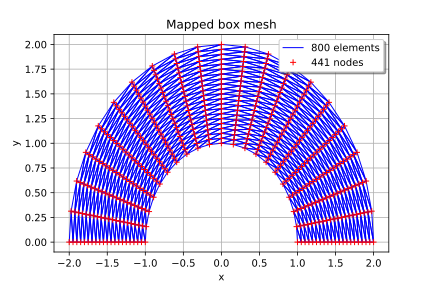

In [10]:
# Case 3: Define a mesh wich is regularly meshed box
# and Transform it through a fuunction

myIndices = [20, 20]
mesher = ot.IntervalMesher(myIndices)
# r in [1., 2.] and theta in (0., pi]
lowerBound2=[1.0, 0.0]
upperBound2=[2.0, m.pi]
myInterval = ot.Interval(lowerBound2, upperBound2)
meshBox2 = mesher.build(myInterval)

# define the mapping function
f = ot.SymbolicFunction(['r', 'theta'], ['r*cos(theta)', 'r*sin(theta)'])
oldVertices = meshBox2.getVertices()
newVertices = f(oldVertices)
meshBox2.setVertices(newVertices)

graphMappedBox = meshBox2.draw()
graphMappedBox.setTitle('Mapped box mesh')
graphMappedBox

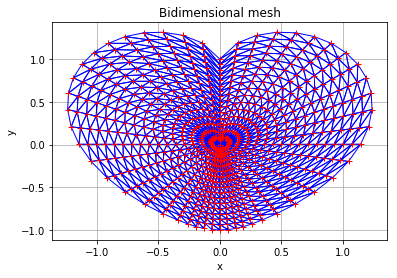

In [6]:
# Create a mesh of dimension 2: the heart
def meshHeart(ntheta, nr):
    # First, build the nodes
    nodes = ot.Sample(0, 2)
    nodes.add([0.0, 0.0])
    for j in range(ntheta):
        theta = (m.pi * j) / ntheta
        if (abs(theta - 0.5 * m.pi) < 1e-10):
            rho = 2.0
        elif (abs(theta) < 1e-10) or (abs(theta-m.pi) < 1e-10):
            rho = 0.0
        else:
            absTanTheta = abs(m.tan(theta))
            rho = absTanTheta**(1.0 / absTanTheta) + m.sin(theta)
        cosTheta = m.cos(theta)
        sinTheta = m.sin(theta)
        for k in range(nr):
            tau = (k + 1.0) / nr
            r = rho * tau
            nodes.add([r * cosTheta, r * sinTheta - tau])
    # Second, build the triangles
    triangles = []
    ## First heart
    for j in range(ntheta):
        triangles.append([0, 1 + j * nr, 1 + ((j + 1) % ntheta)* nr])
    # Other hearts
    for j in range(ntheta):
        for k in range(nr-1):
            i0 = k + 1 + j * nr
            i1 = k + 2 + j * nr
            i2 = k + 2 + ((j + 1) % ntheta) * nr
            i3 = k + 1 + ((j + 1) % ntheta) * nr
            triangles.append([i0, i1, i2%(nr*ntheta)])
            triangles.append([i0, i2, i3%(nr*ntheta)])
    return ot.Mesh(nodes, triangles)

mesh4 = meshHeart(48, 16)
graphMesh = mesh4.draw()
graphMesh.setTitle('Bidimensional mesh')
graphMesh.setLegendPosition('')
graphMesh